In [5]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

le = LabelEncoder()
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
df = pd.read_csv('df_with_emotions.csv')

In [7]:
df.head()

,Student_ID,Age,Gender,GPA,Stress_Level,Anxiety_Score,Depression_Score,Daily_Reflections,Sleep_Hours,Steps_Per_Day,...,fear,anger,anticipation,trust,surprise,sadness,joy,disgust,negative,positive
0,1,1.159999,Other,-0.566791,1.354829,1.607159,-0.916966,Onto foreign do environmental anyone every nea...,0.483148,-0.963883,...,-0.589006,-0.403906,-0.754115,-0.959785,-0.409189,-0.401565,-0.739343,0.000000,5.918226,-1.297918
1,2,-0.601579,Male,-0.138201,1.354829,-1.074594,-0.796598,Party but others visit admit industry country ...,-0.633426,-0.566872,...,-0.589006,-0.403906,-0.754115,-0.959785,-0.409189,-0.401565,-0.739343,0.000000,-0.558704,2.905716
2,3,0.279210,Female,1.400826,1.354829,0.187407,1.249664,Religious sure wait do chance decade according...,1.468360,0.793510,...,-0.589006,-0.403906,0.977859,-0.959785,2.005550,-0.401565,-0.739343,0.000000,1.060529,-0.247009
3,4,-1.041973,Male,-1.501896,0.655743,0.818408,0.045981,A task effect entire coach join series.,1.402679,-0.263157,...,-0.589006,-0.403906,-0.754115,1.588991,-0.409189,-0.401565,-0.739343,0.000000,-0.558704,0.803899
4,5,-0.601579,Other,0.115057,-1.441515,-1.232344,-1.157703,Knowledge several camera wait week write quali...,-0.107979,-1.201176,...,-0.589006,0.271686,0.311715,-0.175546,0.333807,-0.401565,0.895866,0.076923,0.437747,-0.651205


In [8]:
df["Gender"] = le.fit_transform(df["Gender"]) #changes the 'Gender' column to numerical values
df.head()

,Student_ID,Age,Gender,GPA,Stress_Level,Anxiety_Score,Depression_Score,Daily_Reflections,Sleep_Hours,Steps_Per_Day,...,fear,anger,anticipation,trust,surprise,sadness,joy,disgust,negative,positive
0,1,1.159999,2,-0.566791,1.354829,1.607159,-0.916966,Onto foreign do environmental anyone every nea...,0.483148,-0.963883,...,-0.589006,-0.403906,-0.754115,-0.959785,-0.409189,-0.401565,-0.739343,0.000000,5.918226,-1.297918
1,2,-0.601579,1,-0.138201,1.354829,-1.074594,-0.796598,Party but others visit admit industry country ...,-0.633426,-0.566872,...,-0.589006,-0.403906,-0.754115,-0.959785,-0.409189,-0.401565,-0.739343,0.000000,-0.558704,2.905716
2,3,0.279210,0,1.400826,1.354829,0.187407,1.249664,Religious sure wait do chance decade according...,1.468360,0.793510,...,-0.589006,-0.403906,0.977859,-0.959785,2.005550,-0.401565,-0.739343,0.000000,1.060529,-0.247009
3,4,-1.041973,1,-1.501896,0.655743,0.818408,0.045981,A task effect entire coach join series.,1.402679,-0.263157,...,-0.589006,-0.403906,-0.754115,1.588991,-0.409189,-0.401565,-0.739343,0.000000,-0.558704,0.803899
4,5,-0.601579,2,0.115057,-1.441515,-1.232344,-1.157703,Knowledge several camera wait week write quali...,-0.107979,-1.201176,...,-0.589006,0.271686,0.311715,-0.175546,0.333807,-0.401565,0.895866,0.076923,0.437747,-0.651205


In [9]:
X = df.drop(columns=['Mental_Health_Status', 'Daily_Reflections', 'Student_ID', 'Stress_Level', 'Depression_Score', 'Anxiety_Score'])
Y = df['Mental_Health_Status']
X.head()

,Age,Gender,GPA,Sleep_Hours,Steps_Per_Day,fear,anger,anticipation,trust,surprise,sadness,joy,disgust,negative,positive
0,1.159999,2,-0.566791,0.483148,-0.963883,-0.589006,-0.403906,-0.754115,-0.959785,-0.409189,-0.401565,-0.739343,0.000000,5.918226,-1.297918
1,-0.601579,1,-0.138201,-0.633426,-0.566872,-0.589006,-0.403906,-0.754115,-0.959785,-0.409189,-0.401565,-0.739343,0.000000,-0.558704,2.905716
2,0.279210,0,1.400826,1.468360,0.793510,-0.589006,-0.403906,0.977859,-0.959785,2.005550,-0.401565,-0.739343,0.000000,1.060529,-0.247009
3,-1.041973,1,-1.501896,1.402679,-0.263157,-0.589006,-0.403906,-0.754115,1.588991,-0.409189,-0.401565,-0.739343,0.000000,-0.558704,0.803899
4,-0.601579,2,0.115057,-0.107979,-1.201176,-0.589006,0.271686,0.311715,-0.175546,0.333807,-0.401565,0.895866,0.076923,0.437747,-0.651205


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [11]:
model = XGBClassifier(objective="multi:softmax", num_class=3, random_state=42) #plot the parameters to find the best fit
param_grid = {
    'n_estimators': [1, 3, 5, 10],
    'learning_rate': [0.1, 0.5, 1],
    'max_depth': [3, 5],
}

In [12]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

,estimator,"XGBClassifier..._class=3, ...)"
,param_grid,"{'learning_rate': [0.1, 0.5, ...], 'max_depth': [3, 5], 'n_estimators': [1, 3, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,objective,'multi:softmax'


In [13]:
results = pd.DataFrame(grid_search.cv_results_)

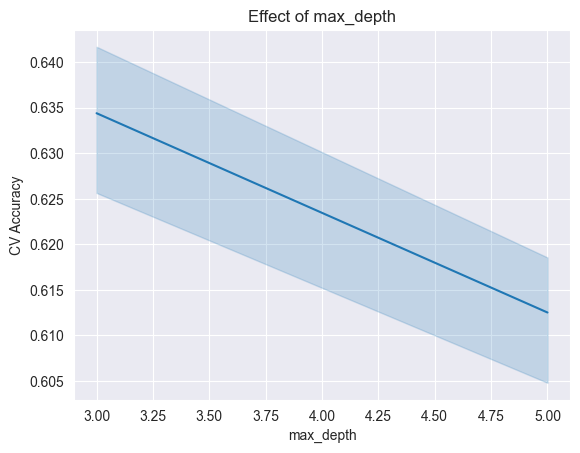

In [14]:
sns.lineplot(x='param_max_depth', y='mean_test_score', data=results)
plt.title("Effect of max_depth")
plt.ylabel("CV Accuracy")
plt.xlabel("max_depth")
plt.show()

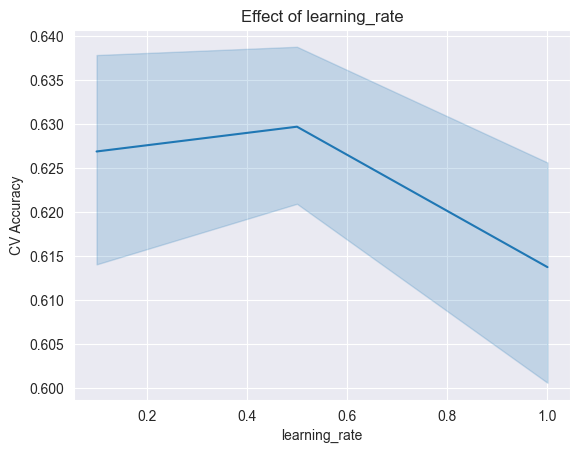

In [15]:
sns.lineplot(x='param_learning_rate', y='mean_test_score', data=results)
plt.title("Effect of learning_rate")
plt.ylabel("CV Accuracy")
plt.xlabel("learning_rate")
plt.show()

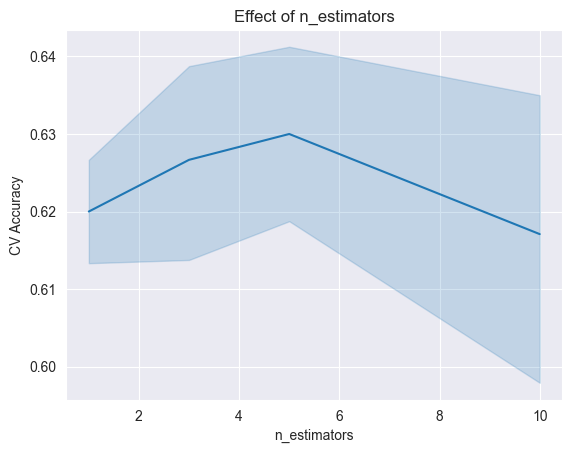

In [16]:
sns.lineplot(x='param_n_estimators', y='mean_test_score', data=results)
plt.title("Effect of n_estimators")
plt.ylabel("CV Accuracy")
plt.xlabel("n_estimators")
plt.show()

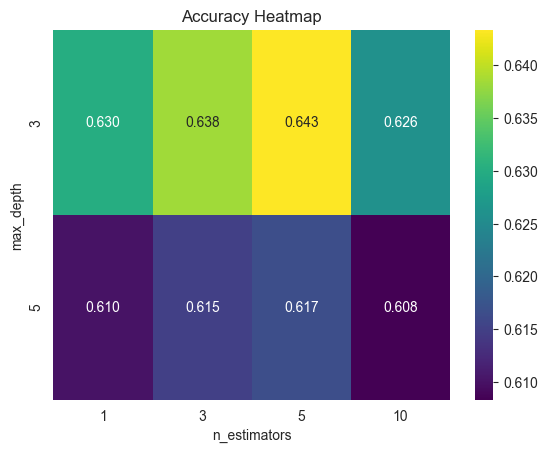

In [17]:
pivot = results.pivot_table(index='param_max_depth',
                             columns='param_n_estimators',
                             values='mean_test_score')

sns.heatmap(pivot, annot=True, fmt=".3f", cmap="viridis")
plt.title("Accuracy Heatmap")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.show()

In [18]:
model = XGBClassifier(objective="multi:softmax", num_class=3, random_state=42)

In [19]:
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
print("Accuracy scores for each fold:", scores)
print("Average accuracy:", scores.mean())

Accuracy scores for each fold: [0.575 0.55  0.6   0.525 0.625 0.6   0.6   0.675 0.55  0.6  ]
Average accuracy: 0.59


In [20]:
model.fit(X_train, y_train)

,objective,'multi:softmax'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [21]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.61


In [22]:
import joblib
joblib.dump(model, 'XGBoost_model.pkl')

['XGBoost_model.pkl']

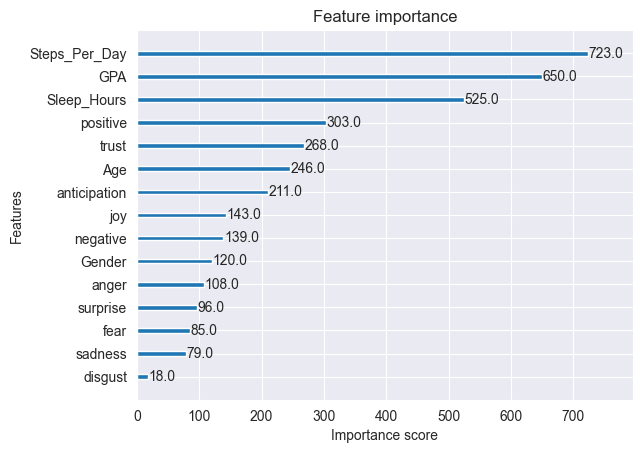

In [23]:
import matplotlib.pyplot as plt
xgb.plot_importance(model)
plt.show()